# Sentiment Analyser for Product Reviews
## FIT5149 Assignment 2 Semester 2 2019

### Group Members
* Siddhant Sharma
    * Student Id: 29047137
    * Email: ssha0045@student.monash.edu
    

* Shubham Diwe
    * Student Id: 29329604
    * Email: sdiw0001@student.monash.edu
    

* Suyash Sathe
    * Student Id: 29279208
    * Email: ssat0005@student.monash.edu

### Programming Language
* Python 3.7 in Jupyter Notebook

### Python Librarires Used
* Pandas           
* NLTK          
* Sklearn          
* Numpy
* Textblob         
* Matplotlib    
* Gensim           
* Time
* Scipy

### Note
1. This code takes approximately 2 hours to run on a windows machine when run all
2. The additional packages used in this code file must be installed explicitly using "pip" if they are not already installed.

# Import Libraries

Load the following set of libraries and packages

In [3]:
import re
import time
import nltk
import gensim
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from scipy.stats import norm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy.sparse import vstack, hstack
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Read the data

There are two datasets provided as a part of these assignment:

  1.  **Labelled dataset:** labeled_data.csv
  2.  **Unabelled dataset:** unlabeled_data.csv

## Unlabelled Data

Read the unlabelled data.

In [4]:
unlabelled_data = pd.read_csv('unlabeled_data.csv')

unlabelled_data['TextLength'] = unlabelled_data['text'].apply(len)

unlabelled_data.head()

,text,TextLength
0,Had a good experience when my wife and I sat a...,500
1,On my first to Montreal with my gf we came her...,1624
2,One of our favorite places to go when it's col...,143
3,"The doctor was very nice, got in in a good amo...",707
4,The Nook is an immediate phoenix staple! I ca...,1126


### Shape of unlabelled Data
Check the shape of the unlabelled data

In [5]:
unlabelled_data.shape

(600000, 2)

## Labelled Data
Read the unlabelled data.

In [6]:
labelled_data = pd.read_csv('labeled_data.csv')
labelled_data['TextLength'] = labelled_data['text'].apply(len)
labelled_data.head()

,text,label,TextLength
0,The new rule is - \r\nif you are waiting for a...,4,616
1,"Flirted with giving this two stars, but that's...",3,1124
2,I was staying at planet Hollywood across the s...,5,593
3,Food is good but prices are super expensive. ...,2,706
4,Worse company to deal with they do horrible wo...,1,630


### Shape of labelled Data
Check the shape of the unlabelled data

In [7]:
labelled_data.shape

(50000, 3)

# Data Preparation

This section analyses the sentiments associated with each user review.For this, the polarity score of each review is generated and analysed.
**TextBlob** library is used to calculate the sentiment polarity of each review.

In [33]:
labelled_data['polarity'] = labelled_data['text'].map(lambda text: TextBlob(text).sentiment.polarity)
labelled_data['word_count'] = labelled_data['text'].apply(lambda x: len(str(x).split()))

## Analysis of sentiment polarity score

**Following are some sample reviews with a positive sentiment polarity score (1)**

In [9]:
sample_positives = labelled_data.loc[labelled_data.polarity == 1, ['text']].sample(3).values

i = 1

for each in sample_positives:
    print(str(i) + ". " + each[0] + "\n")
    i +=1

1. Food was great! Burger and wings were excellent. Like the way the presented the fries with variety of sizes. A must try!! Service was great!

2. I stayed 2 nights at the Bellagio and i had the best view of the fountain and i so would do it again, its so calming to see the fountain dance.

3. Nous avons organiser notre souper des ventes. Ambiance trÃ¨s sympathique, excellent service et trÃ¨s bonne nourriture. Bref nous avons passÃ©s un bon moment. Je vous le recommande.



**Following are some sample reviews with a neutral sentiment polarity score (0)**

In [17]:
sample_positives = labelled_data.loc[labelled_data.polarity == 0, ['text']].sample(3).values

i = 1

for each in sample_positives:
    print(str(i) + ". " + each[0] + "\n")
    i +=1

1. Big store. Lots of selection.

They say no picture taking. So I'll take my $2500 to the bay area location and buy what I wanted.

2. Petit arrÃªt lors d'une journÃ©e oÃ¹ nous jouions les touristes dans notre propre ville. Les enfants voulaient une crÃ¨me glacÃ©e, alors pourquoi pas. Mauvaise idÃ©e. Il y a beaucoup trop d'offres dans le secteur pour perdre notre temps avec un aussi mauvais service. Tellement que j'ai prÃ©fÃ©rÃ© me passer de crÃ¨me glacÃ©e. Et mon conjoint a dÃ» s'obstiner avec la caissiÃ¨re pour ravoir son change, elle disait qu'il avait donnÃ© un 10$ alors que c'Ã©tait un 20$.

3. Get the rolls. Generous amount of lobster meat. Skip the chowder - too salty.



**Following are some sample reviews with a negative sentiment polarity score (-1)**

In [14]:
sample_positives = labelled_data.loc[labelled_data.polarity == -1, ['text']].sample(3).values

i = 1

for each in sample_positives:
    print(str(i) + ". " + each[0] + "\n")
    i +=1

1. What a terrible company! He tried to up charge me for things that I repeatedly told him I didn't need. When I refused to let him up charge me the morning of my appointment he stormed out like a child. Don't use them!

2. I would not give this pharmacy any stars.... Worst customer service lost my prescriptions two months in a row. Customer service is horrible, horrible, absolutely horrible....

3. Horrible Apts BED BUGS Infested!!!! And They Charge You To Get Rid Of Them Nasty Nasty Do Not Rent With Them...



## Sentiment polarity distribution of labelled data

The distribution of polarity scores is slightly biased towards 1 which indicates most of the reviews are positive.

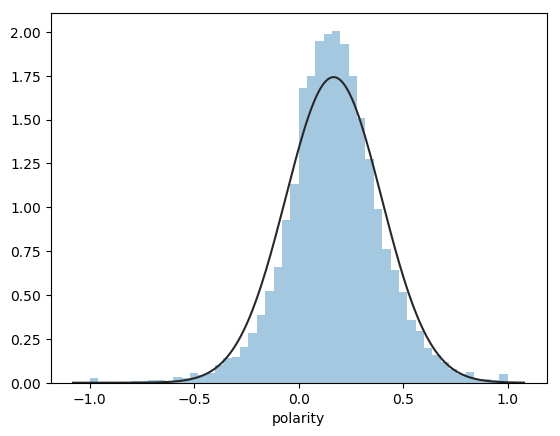

In [23]:
polarity_distribution = sns.distplot(labelled_data['polarity'], kde=False, fit=norm)

## Rating distribution of labelled data

It can be observed that each rating has almost equal number of reviews.

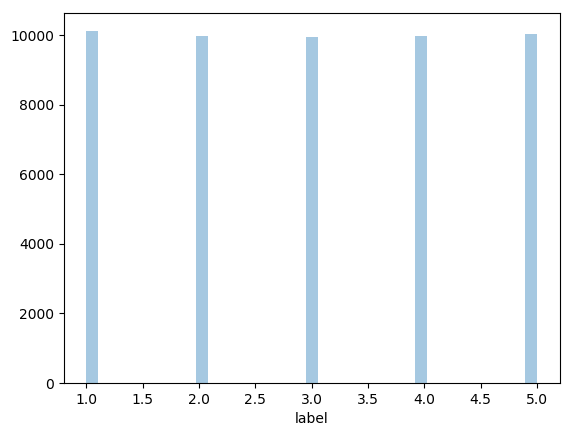

In [24]:
rating_distribution = sns.distplot(labelled_data['label'], kde=False)

## Distribution of text length

### Distribution of text length of labelled Data


The distribution of text lengths for each user rating is right skewed for labelled data.

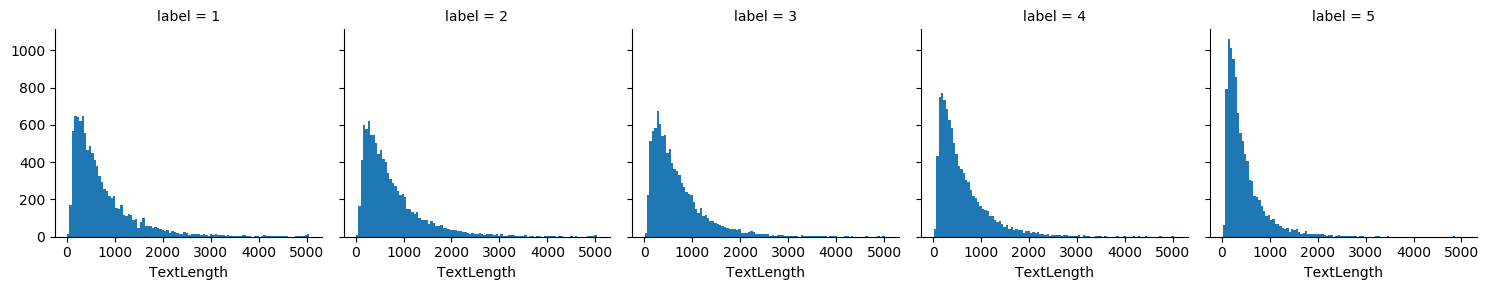

In [25]:
lab_textlen = sns.FacetGrid(data=labelled_data, col='label')
labelled_data_distribution = lab_textlen.map(plt.hist, 'TextLength', bins = 100)

### Distribution of text length of unlabelled Data

The distribution of text lengths for unlabelled data is similar to the labelled data.

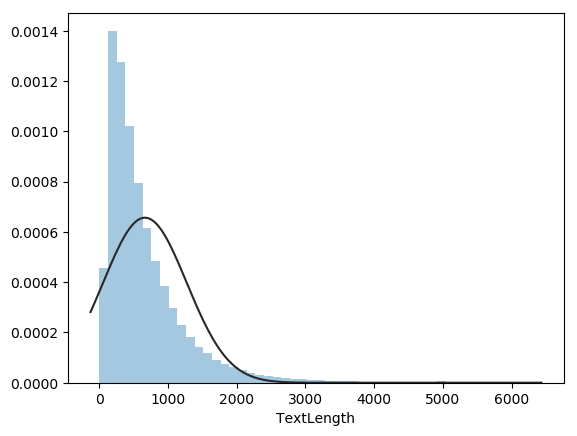

In [27]:
unlabelled_data_distribution = sns.distplot(unlabelled_data['TextLength'], kde=False, fit=norm)

## Distribution of top 20 unigrams before removing stop words

Get the list of top 20 top unigrams before removing stop words

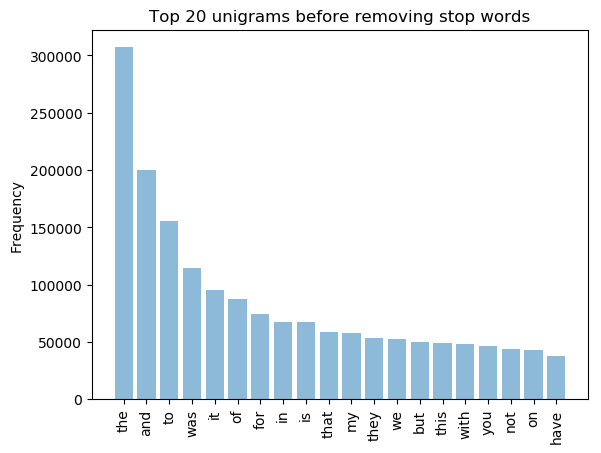

In [29]:
def list_of_words1(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = list_of_words1(labelled_data['text'], 20)

# create DataFrame using data 
df_with_stopwords = pd.DataFrame.from_records(common_words, columns =['text', 'count']) 

# Plot the frequency of words
plt.bar(df_with_stopwords["text"], df_with_stopwords["count"], align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 20 unigrams before removing stop words')

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(df_with_stopwords["text"], df_with_stopwords["text"], rotation='vertical')

plt.show()

## Distribution of top 20 unigrams after removing stop words

Get the list of top 20 top unigrams before after stop words

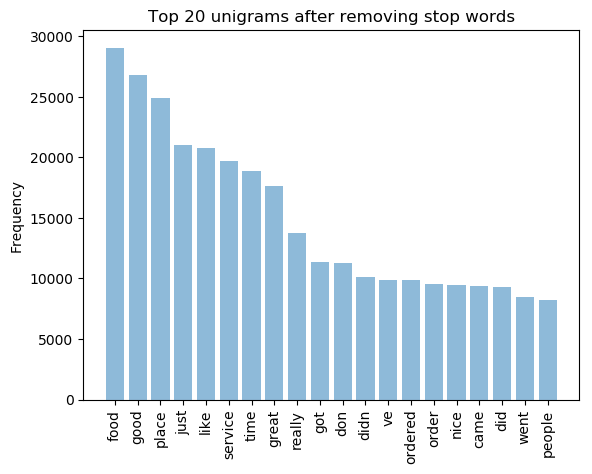

In [30]:
def list_of_words2(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words_without_stopwords = list_of_words2(labelled_data['text'], 20)

# create DataFrame using data 
df_without_stopwords = pd.DataFrame.from_records(common_words_without_stopwords, columns =['text', 'count']) 


# Plot the frequency of words
plt.bar(df_without_stopwords["text"], df_without_stopwords["count"], align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 20 unigrams after removing stop words')

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(df_without_stopwords["text"], df_without_stopwords["text"], rotation='vertical')

plt.show()

## Distribution of top 20 bigrams before removing stop words

This function gets the list of top 20 top bigrams before removing stop words

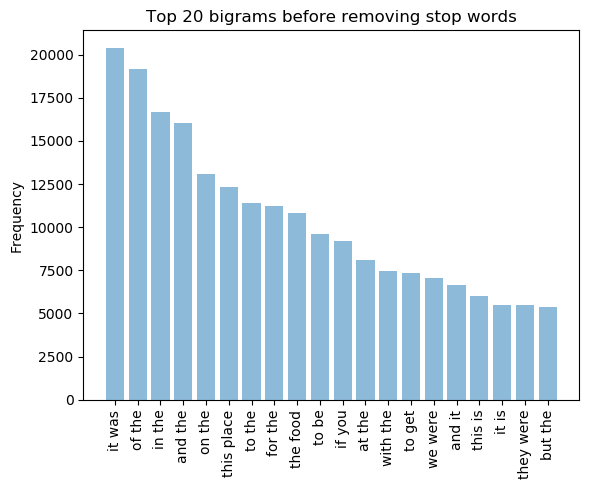

In [31]:
def list_of_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams = list_of_bigram(labelled_data['text'], 20)

# create DataFrame using data 
bigrams_with_stopwords = pd.DataFrame.from_records(bigrams, columns =['text', 'count']) 

# Plot the frequency of words
plt.bar(bigrams_with_stopwords["text"], bigrams_with_stopwords["count"], align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 20 bigrams before removing stop words')

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(bigrams_with_stopwords["text"], bigrams_with_stopwords["text"], rotation='vertical')

plt.show()

## Distribution of top 20 bigrams after removing stop words

This function gets the list of top 20 top bigrams after removing stop words

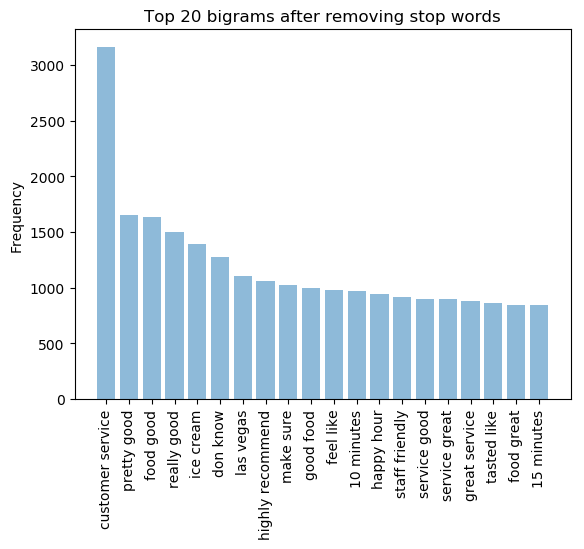

In [32]:
def list_of_bigram2(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

bigrams_without_stopwords = list_of_bigram2(labelled_data['text'], 20)


# create DataFrame using data 
bigrams_df_without_stopwords = pd.DataFrame.from_records(bigrams_without_stopwords, columns =['text', 'count']) 

# Plot the frequency of words
plt.bar(bigrams_df_without_stopwords["text"], bigrams_df_without_stopwords["count"], align='center', alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 20 bigrams after removing stop words')

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(bigrams_df_without_stopwords["text"], bigrams_df_without_stopwords["text"], rotation='vertical')

plt.show()

# Feature Extraction

The following pre-processing on the text was done in order to do the feature extraction. 

### Text lemmatization
The function "lemma" is used for lemmatization of the sentence tokens

In [0]:
def lemma(text):
    wl = WordNetLemmatizer()
    return [wl.lemmatize(w) for w in simple_preprocess(text)]

### Load the NLTK libraries
NLTK platform is used for pre-processing the text as well as feature extraction and reduction. The following packages from the NLTK library are used for creating a corpus of words and its vector representation

In [0]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Create a corpus of vectors. Using TfidfVectorizer, create a vector representation of the corpus

In [0]:
corps = labelled_data['text'].values.tolist()

vectorizer = TfidfVectorizer(input='content',
                             analyzer='word',
                             token_pattern='(?u)\\b\\w\\w+\\b',
                             tokenizer=lemma,
                             min_df=5,
                             ngram_range=(1,3),
                             max_df = 0.95,
                             max_features=50000,
                             stop_words=stop_words,
                             lowercase=False
                            )
t1 = time.time()   
train_data = vectorizer.fit_transform(corps)
t2 = time.time()
et = t2 - t1
print('elapsed time = ', et)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


elapsed time =  68.511714220047


Store the target labels in a separte variable

In [0]:
target = labelled_data['label']

### Vector representation of unlabelled data

In [0]:
t1 = time.time()
unlab_corps = unlabelled_data['text'].values.tolist()
unlab_vects = vectorizer.transform(unlab_corps)
t2 = time.time()
et = t2 - t1
print('time taken = ', et)

time taken =  443.61501717567444


# Model Development

Several models were created and tested to perform the sentimental analysis on the product reviews provided by Yelp including SVM, Naive Bayes Classifier, Logistic Regression with cross validation and LSTM deep learning neural network. Comparing the accuracy scores of each model,  Logistic Regression with cross validation model had the best performance.

### LogisticRegressionCV

Create a LogisticRegressionCV model with number of folds = 10.
Use this model to train the labelled data

In [0]:
lr = LogisticRegressionCV(random_state=0, solver='liblinear', multi_class='ovr', cv=10, verbose=2)
lr_model = lr.fit(train_data, target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.8s remaining:    0.0s


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 33.4min finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

### Predict the labels of unlabelled data
Use the LogisticRegressionCV model on the unlabelled data to predict it's label

In [0]:
unlabs = lr_model.predict(unlab_vects)

Using the predicted labels for unlabelled dataset, combine the labelled data and the unlabelled data together to form a single dataset.

In [0]:
tr_data = vstack([train_data, unlab_vects])
tr_labs = np.concatenate((target, unlabs))

### Logistic regression Model

Using the combined dataset, train the logistic regression model.

In [0]:
mod_lr = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr', max_iter=150)
fitter = mod_lr.fit(tr_data, tr_labs)

## Read the test data

In [0]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,test_id,text
0,test_1,trying to have a nice quiet dinner. the annou...
1,test_2,Been getting food to go from here for over 3yr...
2,test_3,Ugh. I've had to eat here a couple of times be...
3,test_4,The people here are so nice! I ordered on eat ...
4,test_5,Heard alot of good things about this place and...


### Vectorize the test data

Create a vector of the test data and use this vector with the pre-trained model to predict its labels

In [0]:
test_corp = test_data['text'].values.tolist()
tester = vectorizer.transform(test_corp)

Use the logistic regression pretictor to predict the labels of the test data

In [0]:
test_data['label'] = lr_model.predict(tester)

In [0]:
test_data.head()

,test_id,text,label
0,test_1,trying to have a nice quiet dinner. the annou...,4
1,test_2,Been getting food to go from here for over 3yr...,4
2,test_3,Ugh. I've had to eat here a couple of times be...,2
3,test_4,The people here are so nice! I ordered on eat ...,5
4,test_5,Heard alot of good things about this place and...,4


### Save the predicted labels on the test data into the csv

In [0]:
test_data.drop(columns=['text'], inplace=True)
test_data.to_csv('LRCV_LR.csv', index=False, encoding='utf-8')